In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd=pd.read_csv('Concrete_Data_V1.0.csv')
cd

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
cd=cd.rename({'CSinMPa' : 'Concrete Compressive Strength in MPa'}, axis = 1)
cd

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,Concrete Compressive Strength in MPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
cd.isnull().sum()

Cement                                  0
Slag                                    0
Flyash                                  0
Water                                   0
SuperPlasticizer                        0
CoarseAggregate                         0
FineAggregate                           0
Age                                     0
Concrete Compressive Strength in MPa    0
dtype: int64

In [ ]:
cd.describe()

In [5]:
cd.columns

Index(['Cement', 'Slag', 'Flyash', 'Water', 'SuperPlasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'Concrete Compressive Strength in MPa'],
      dtype='object')

In [6]:
cd.corr()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,Concrete Compressive Strength in MPa
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperPlasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete Compressive Strength in MPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


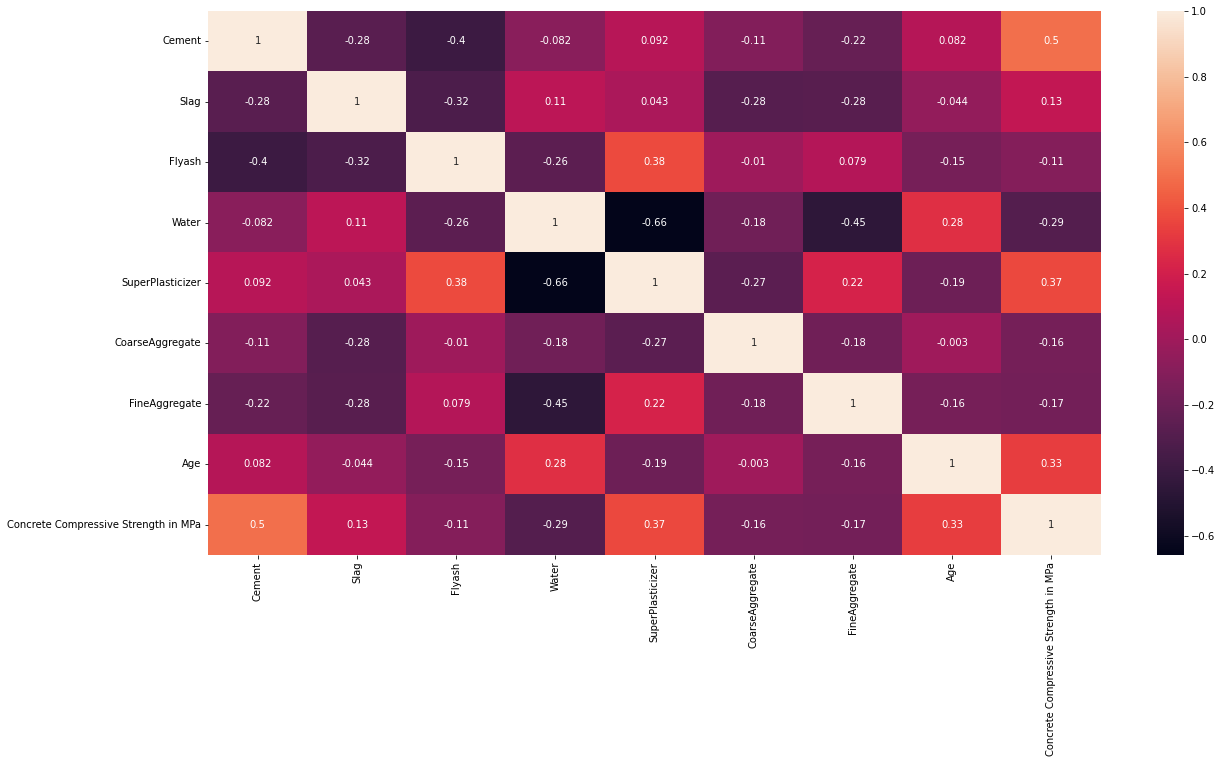

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(cd.corr(), annot=True)

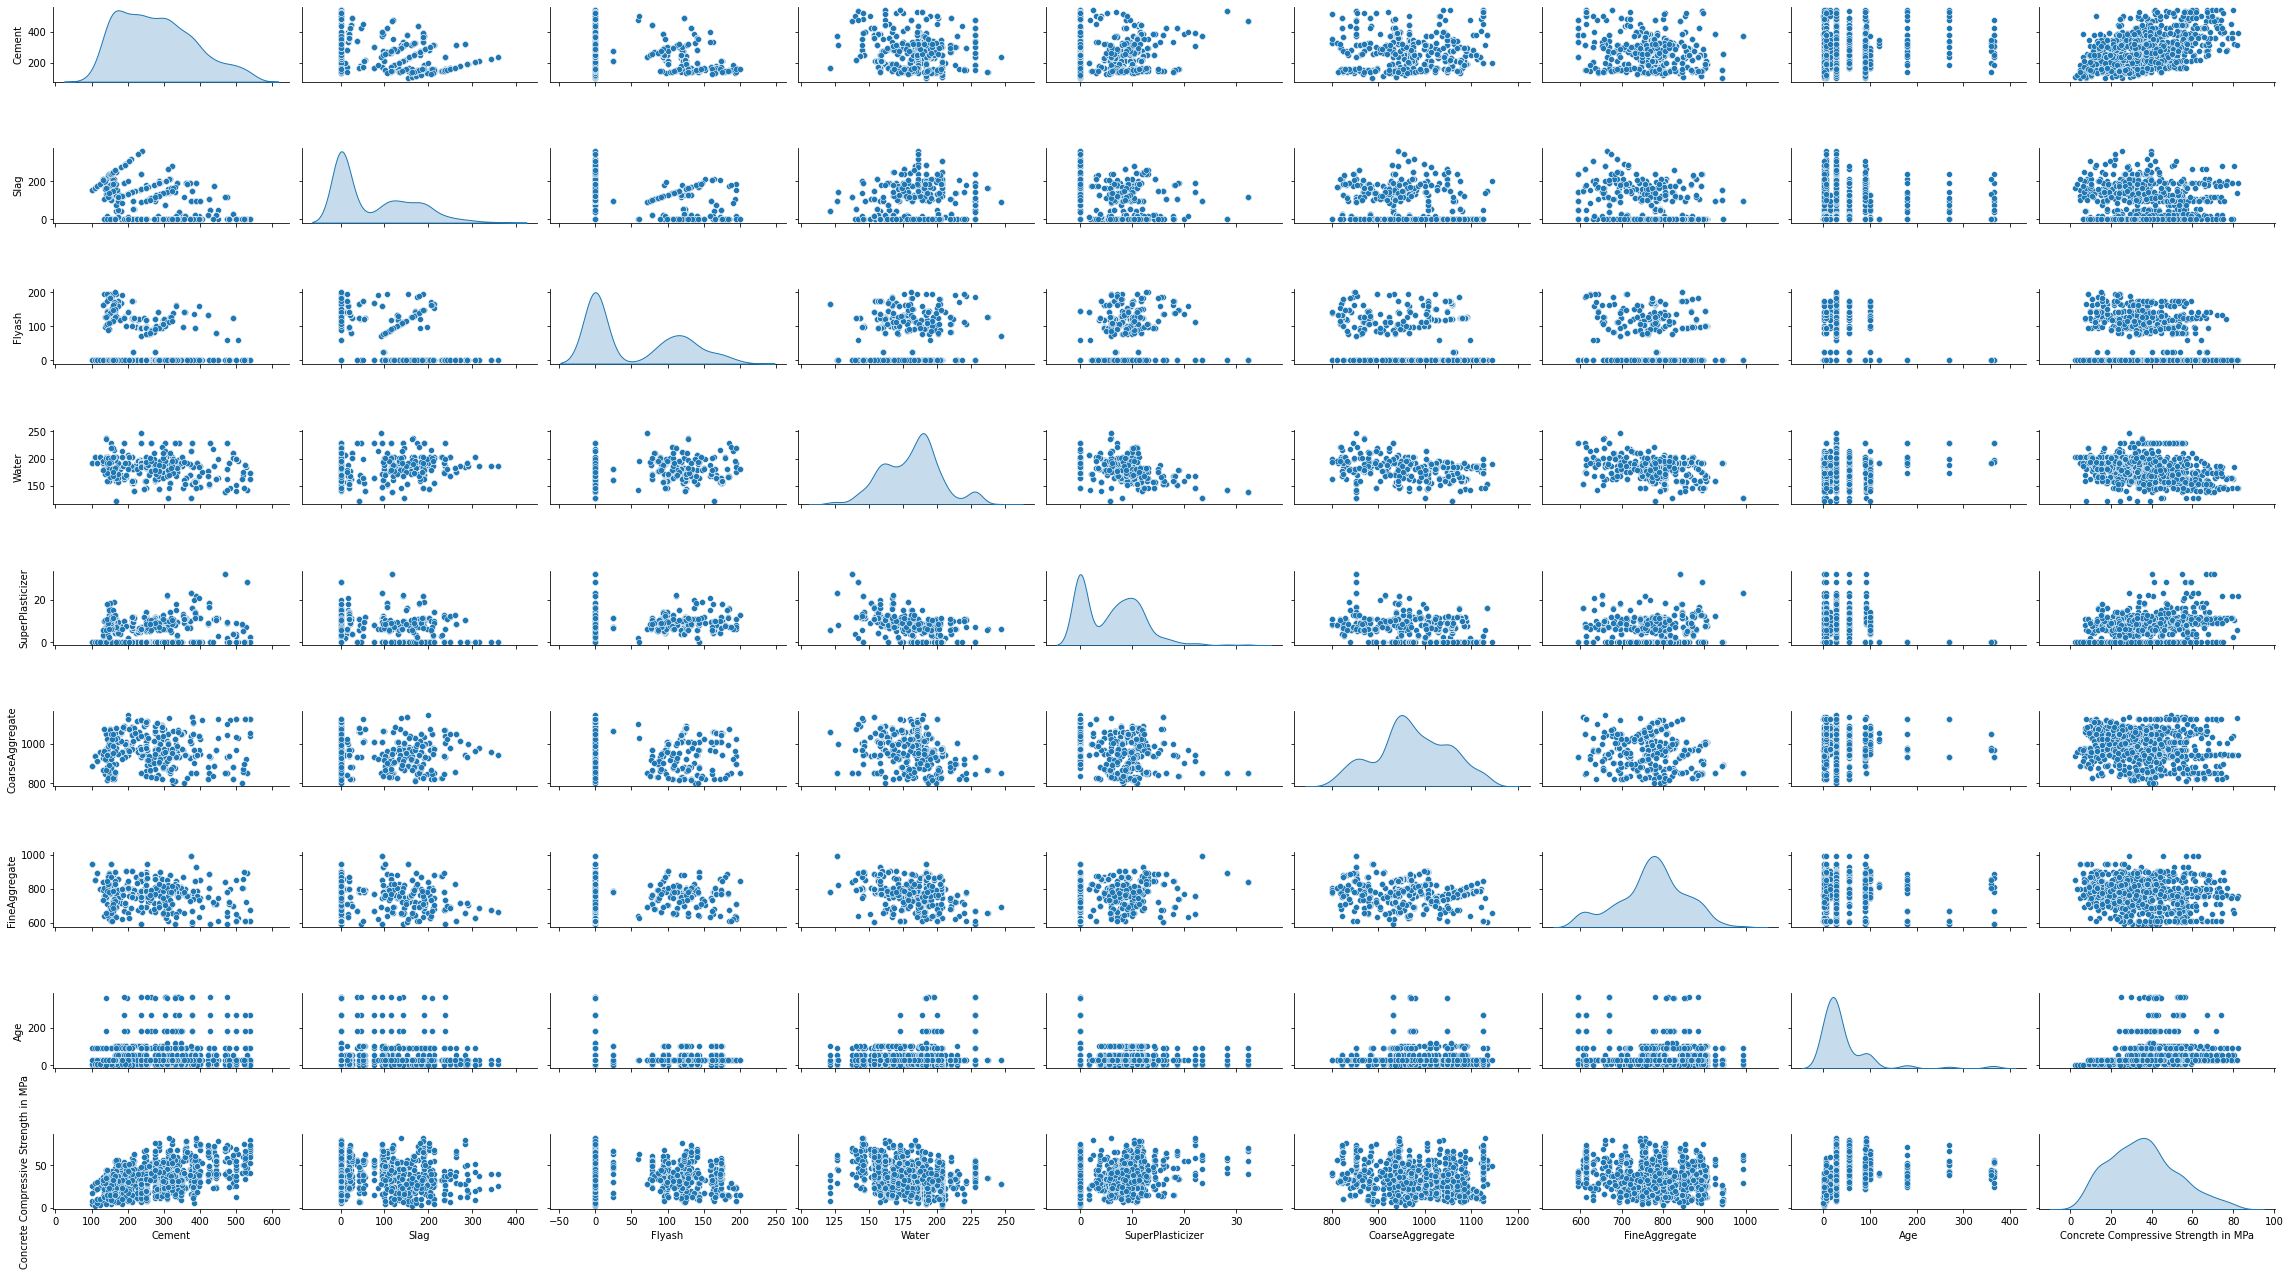

In [8]:
sns.pairplot(cd,height=2.0, aspect=1.8,diag_kind='kde')

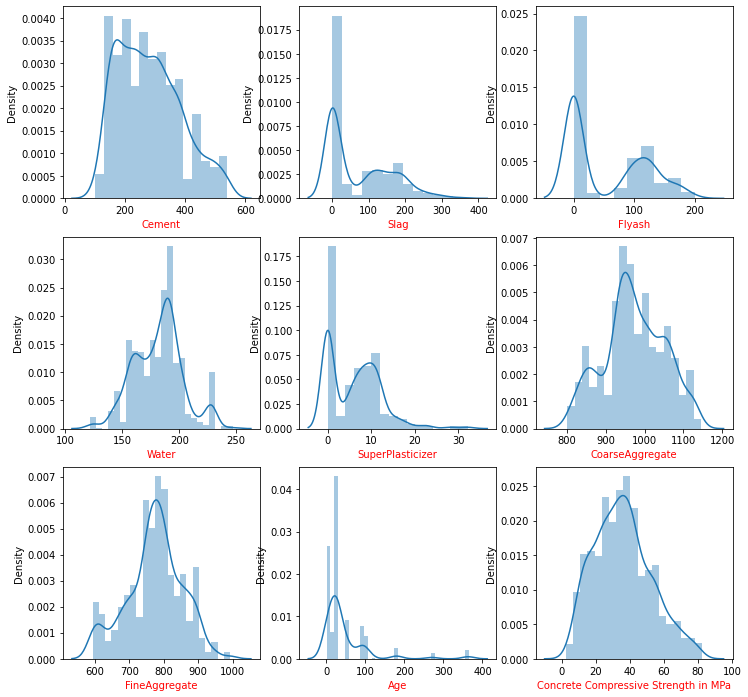

In [9]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in cd.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(cd[column])
    plt.xlabel(column,fontsize=10,color='r')
    plotnumber+=1
plt.show()

In [10]:
x = cd.drop('Concrete Compressive Strength in MPa', axis=1)

In [11]:
x

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
y = cd['Concrete Compressive Strength in MPa']

y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete Compressive Strength in MPa, Length: 1030, dtype: float64

In [14]:
for column in x.columns:
    x[column]+=1
    x[column]= np.log(x[column])
x

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,1.986972,0.000000,0.000000,1.807264,0.812157,2.072912,2.017256,1.474144
1,1.986972,0.000000,0.000000,1.807264,0.812157,2.074711,2.017256,1.474144
2,1.918340,1.786133,0.000000,1.861553,0.000000,2.059035,1.999933,1.887391
3,1.918340,1.786133,0.000000,1.861553,0.000000,2.059035,1.999933,1.931903
4,1.839965,1.773825,0.000000,1.834610,0.000000,2.065208,2.043452,1.929908
...,...,...,...,...,...,...,...,...
1025,1.890920,1.751315,1.707318,1.823950,1.191658,2.050239,2.034115,1.474144
1026,1.913722,0.000000,1.750720,1.837880,1.233613,2.042254,2.041539,1.474144
1027,1.792975,1.782466,1.739911,1.835188,1.085221,2.053487,2.036087,1.474144
1028,1.804313,1.830154,0.000000,1.820329,1.255502,2.066649,2.037565,1.474144


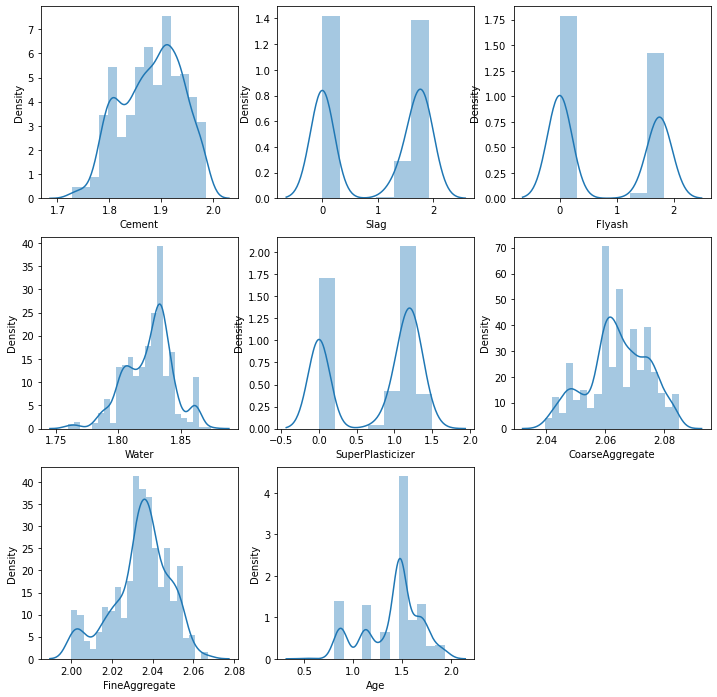

In [16]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

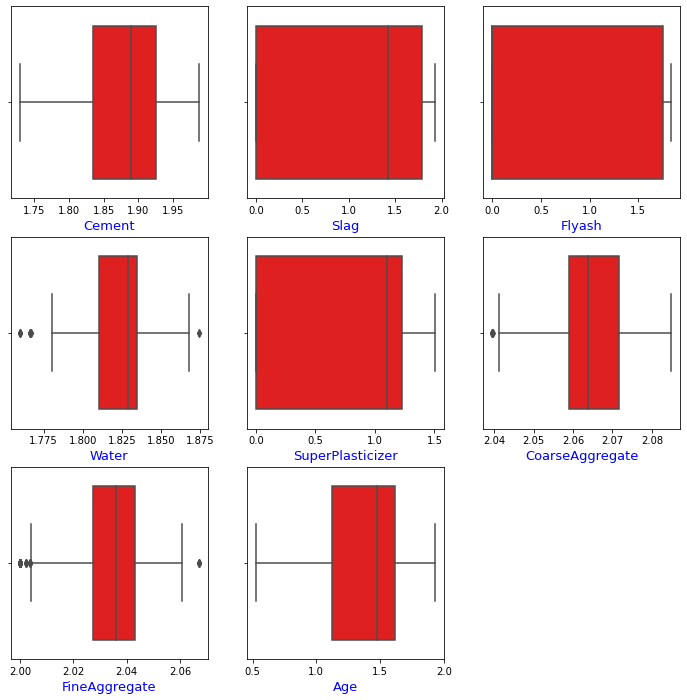

In [17]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x[column],color='r')
    plt.xlabel(column,fontsize=13, c='b')
    plotnumber+=1
plt.show()


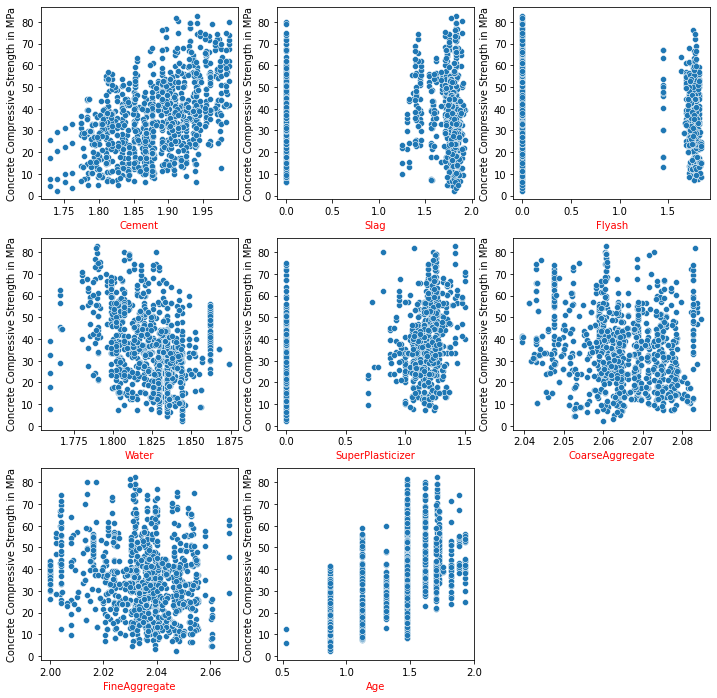

In [18]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column, c='r')
    plotnumber+=1
plt.show()

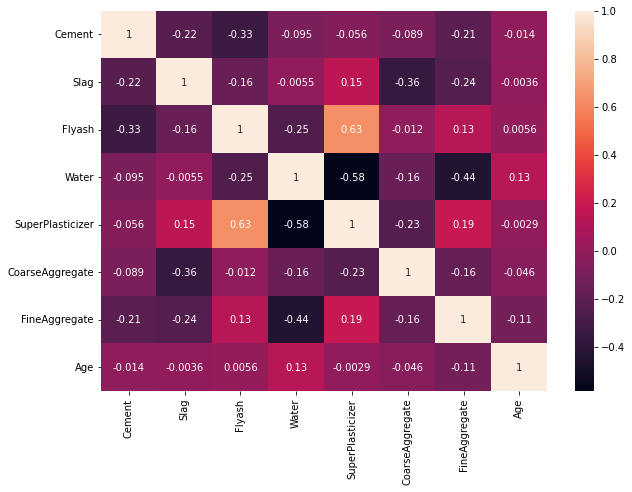

In [19]:
plt.figure(figsize=(10,7),facecolor='white')
sns.heatmap(x.corr(), annot=True)

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=50)
x_train

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
339,1.901774,0.000000,1.753523,1.819593,1.209371,2.070814,2.031571,0.869742
809,1.876926,0.000000,0.000000,1.828693,0.000000,2.081179,2.036754,1.474144
785,1.917677,0.000000,0.000000,1.834610,0.000000,2.065156,2.043373,1.124748
939,1.790050,1.863239,0.000000,1.843033,0.908905,2.043687,2.050490,1.474144
722,1.908029,0.000000,0.000000,1.834610,0.000000,2.069476,2.044155,1.124748
...,...,...,...,...,...,...,...,...
1027,1.792975,1.782466,1.739911,1.835188,1.085221,2.053487,2.036087,1.474144
229,1.851480,1.722075,1.444252,1.825814,1.120655,2.075988,2.036986,0.869742
70,1.935416,1.832274,0.000000,1.815191,1.225816,2.058226,2.032126,0.869742
132,1.930949,1.832105,0.000000,1.810153,1.262345,2.060759,2.031970,1.474144


In [21]:
x_test

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
500,1.973870,1.457646,1.761349,1.841861,0.951363,2.042902,2.021691,1.474144
611,1.891246,0.000000,0.000000,1.833780,0.000000,2.063854,2.048136,1.310506
684,1.834610,1.897084,0.000000,1.834610,0.000000,2.058734,2.024882,1.706721
936,1.867462,1.710074,1.664605,1.873804,1.080418,2.047669,2.021008,1.474144
279,1.876562,0.000000,1.754688,1.831683,1.099106,2.071502,2.032298,0.869742
...,...,...,...,...,...,...,...,...
624,1.906590,0.000000,0.000000,1.835435,0.000000,2.063854,2.041315,1.474144
267,1.850232,0.000000,1.763822,1.804211,1.155229,2.078269,2.039301,1.618011
162,1.935416,1.832274,0.000000,1.815191,1.225816,2.058226,2.032126,1.708702
274,1.876562,0.000000,1.754688,1.831683,1.070529,2.071502,2.032298,0.869742


In [ ]:
y_train

In [22]:
y_test

500    57.92
611    21.26
684    50.73
936    28.63
279    13.12
       ...  
624    27.53
267    45.08
162    64.90
274    17.22
551     8.20
Name: Concrete Compressive Strength in MPa, Length: 309, dtype: float64

In [23]:
scalar = StandardScaler()
X_train = scalar.fit(x_train)
X_train = scalar.transform(x_train)
X_test = scalar.transform(x_test)
X_train= pd.DataFrame(X_train,columns=x_train.columns)
X_train

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,0.349775,-1.116383,1.122303,-0.212619,0.763061,0.664592,-0.169747,-1.911525
1,-0.081882,-1.116383,-0.892235,0.255745,-1.334234,1.671636,0.194661,0.232001
2,0.626053,-1.116383,-0.892235,0.560243,-1.334234,0.114941,0.660064,-1.007139
3,-1.591085,1.030528,-0.892235,0.993764,0.241992,-1.970941,1.160419,0.232001
4,0.458444,-1.116383,-0.892235,0.560243,-1.334234,0.534600,0.715030,-1.007139
...,...,...,...,...,...,...,...,...
716,-1.540276,0.937456,1.106665,0.589987,0.547760,-1.018797,0.147790,0.232001
717,-0.523919,0.867872,0.766996,0.107548,0.609210,1.167260,0.211002,-1.911525
718,0.934208,0.994848,-0.892235,-0.439182,0.791580,-0.558402,-0.130739,-1.911525
719,0.856612,0.994653,-0.892235,-0.698438,0.854928,-0.312309,-0.141691,0.232001


In [24]:
X_test= pd.DataFrame(X_test,columns=x_test.columns)
X_test

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age
0,1.602222,0.563185,1.131293,0.933440,0.315622,-2.047205,-0.864398,0.232001
1,0.166885,-1.116383,-0.892235,0.517535,-1.334234,-0.011620,0.994955,-0.348344
2,-0.816994,1.069525,-0.892235,0.560243,-1.334234,-0.509007,-0.640035,1.056838
3,-0.246287,0.854043,1.020149,2.577429,0.539430,-1.584043,-0.912423,0.232001
4,-0.088196,-1.116383,1.123641,0.409625,0.571838,0.731389,-0.118587,-1.911525
...,...,...,...,...,...,...,...,...
304,0.433441,-1.116383,-0.892235,0.602696,-1.334234,-0.011620,0.515377,0.232001
305,-0.545615,-1.116383,1.134134,-1.004295,0.669169,1.388869,0.373767,0.742229
306,0.934208,0.994848,-0.892235,-0.439182,0.791580,-0.558402,-0.130739,1.063865
307,-0.088196,-1.116383,1.123641,0.409625,0.522281,0.731389,-0.118587,-1.911525


In [25]:
print(X_train.mean())

Cement             -2.521638e-15
Slag               -9.362214e-17
Flyash              6.036164e-17
Water               1.054974e-14
SuperPlasticizer   -1.970992e-17
CoarseAggregate     2.488871e-14
FineAggregate       1.453114e-14
Age                -1.995630e-16
dtype: float64


In [26]:
print(X_train.var())

Cement              1.001389
Slag                1.001389
Flyash              1.001389
Water               1.001389
SuperPlasticizer    1.001389
CoarseAggregate     1.001389
FineAggregate       1.001389
Age                 1.001389
dtype: float64


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [29]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}

In [30]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('model trained with. {}'.format(name))

model trained with.                      Linear Regression
model trained with.                  L2 (Ridge) Regression
model trained with. Support Vector Machine (Linear Kernel)
model trained with.    Support Vector Machine (RBF Kernel)
model trained with.                          Decision Tree
model trained with.                         Neural Network
model trained with.                          Random Forest
model trained with.                      Gradient Boosting
model trained with.                               AdaBoost


In [31]:
from sklearn.metrics import r2_score

In [32]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(score)

0.8087515633695211
0.8087194989096983
0.7970415664465689
0.7881762562597692
0.8213347125467487
0.7777184536178946
0.9076800919914623
0.9038593521190746
0.7757504590342507


In [33]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score before hyperparameter tuning {}'.format(score))

score before hyperparameter tuning 0.9039055100910522


In [34]:
param = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 5]
}

In [35]:
clf = GridSearchCV(estimator=best_model,param_grid=param)
clf.fit(X_train,y_train)
#best_accuracy = clf.best_score_
best_param = clf.best_params_

In [36]:
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print(best_param)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [37]:
y_pred = clf.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score after hyperparameter tuning {}'.format(score))

score after hyperparameter tuning 0.9361757582778139
